In [1]:
# effects of weighing and trimming

In [2]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [3]:
# statistics functions

import scikit_posthocs as scp

In [4]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import indoor data into df2
df2 = x2.parse('Indoor')

# Import offshore data ito df2
df3 = x2.parse('Offshore')

# Import outdoor data ito df4
df4 = x2.parse('Outdoor')

In [5]:
df2.head()

,Sample,Exp,Sleeve,Week,Stage,Timei,Timeh,Time,DW,mmi,...,Weighing,Trimming,Frequency,Amplitude,Duration,Flux,Sporulated,Comment,Day,Comment2
0,0.0,1,0,0.0,i,"2019,3,12,13,0","2019,3,12,13,0","2019,3,12,13,0",0.750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,0.7,1,0,0.0,f,"2019,3,12,13,0","2019,3,12,13,0","2019,3,19,13,0",0.753,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
2,1.0,1,1,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.144,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN
3,2.0,1,2,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.153,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN
4,3.0,1,3,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.159,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN


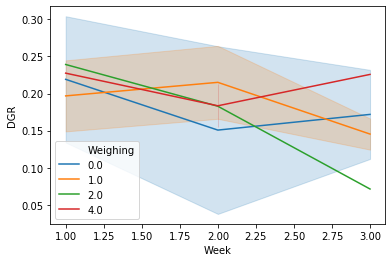

In [6]:
# weighing effect - option 1
palette = sns.color_palette("tab10",4)

d = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')&(np.isnan(df2.Weighing)!= True)&(df2.Exp != 4)]
sns.lineplot(data=d,palette=palette, x="Week", y="DGR", hue="Weighing",err_style="band", ci="sd")


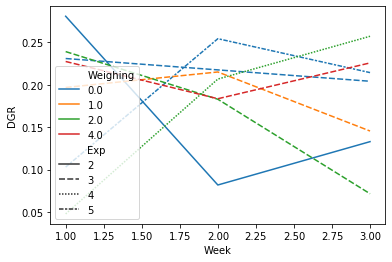

In [7]:
# weighing effect - option 1
palette = sns.color_palette("tab10",4)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
sns.lineplot(data=d,palette=palette, x="Week", y="DGR", hue="Weighing",style = 'Exp',err_kws=None,ci=None)#,err_style="band", ci="sd")


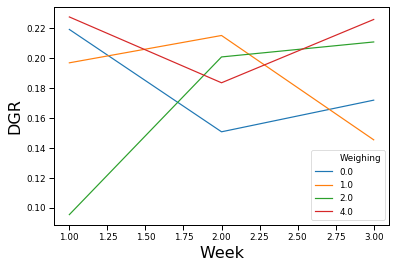

In [31]:
# weighing effect - option 1
palette = sns.color_palette("tab10",4)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
sns.lineplot(data=d,palette=palette, x="Week", y="DGR", hue="Weighing",err_kws=None,ci=None)#,err_style="band", ci="sd")


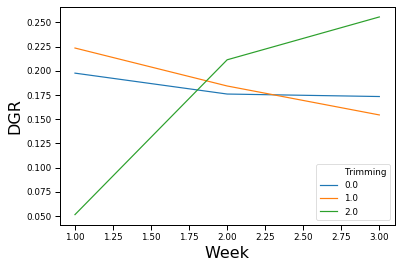

In [36]:
# weighing effect - option 1
palette = sns.color_palette("tab10",3)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
sns.lineplot(data=d,palette=palette, x="Week", y="DGR", hue="Trimming",err_kws=None,ci=None)#,err_style="band", ci="sd")


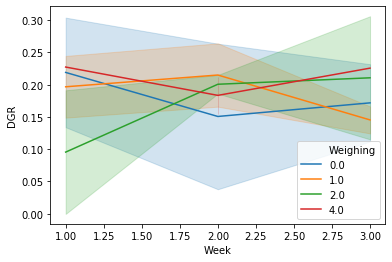

In [8]:
# weighing effect - option 2
palette = sns.color_palette("tab10",4)

d = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')&(np.isnan(df2.Weighing)!= True)]
sns.lineplot(data=d,palette=palette, x="Week", y="DGR", hue="Weighing",err_style="band", ci="sd")


In [9]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')]
rp.summary_cont(dW['DGR'].groupby(dW['Weighing']))

,N,Mean,SD,SE,95% Conf.,Interval
Weighing,,,,,,
0.0,20,0.1878,0.0870,0.0195,0.1471,0.2285
1.0,9,0.1857,0.0476,0.0159,0.1492,0.2223
2.0,12,0.1690,0.0895,0.0258,0.1121,0.2259
4.0,4,0.2050,0.0300,0.0150,0.1572,0.2528


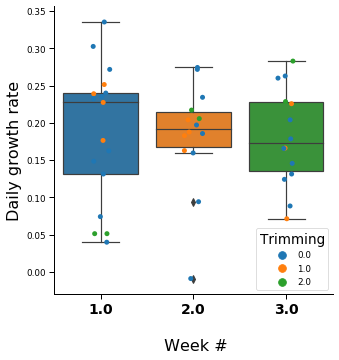

In [10]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


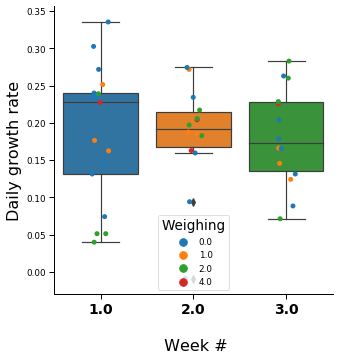

In [11]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


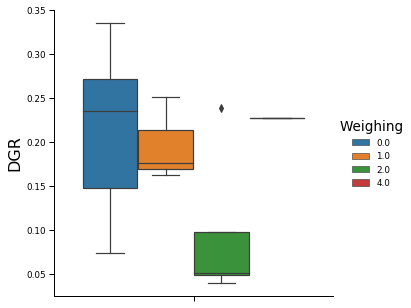

In [27]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],kind='box',hue='Weighing').set(xlabel='')
SA1_TRM.set_xticklabels([''])
#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


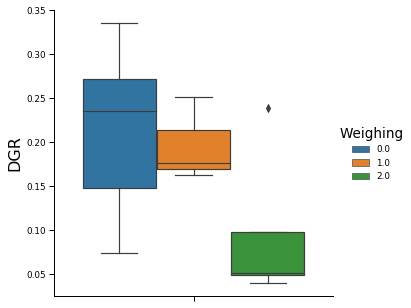

In [30]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)&(df2.Weighing != 4)],kind='box',hue='Weighing').set(xlabel='')
SA1_TRM.set_xticklabels([''])
#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


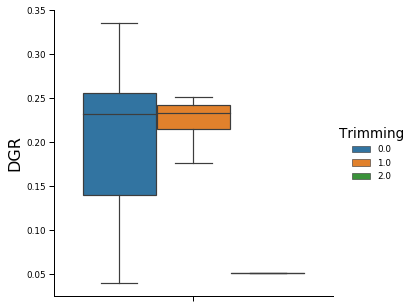

In [34]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],kind='box',hue='Trimming').set(xlabel='')
SA1_TRM.set_xticklabels([''])
#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


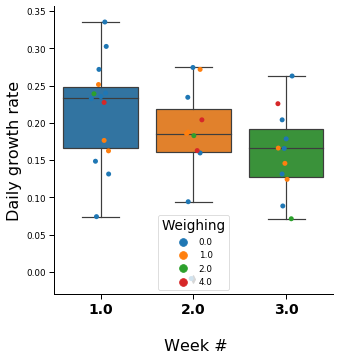

In [12]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Exp != 4)],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Exp != 4)],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


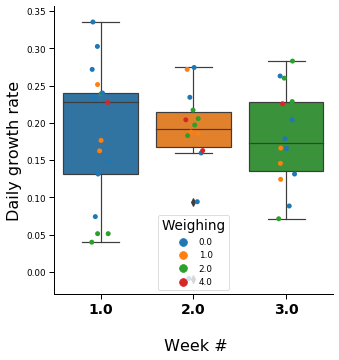

In [13]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


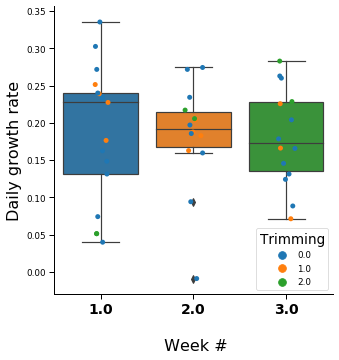

In [14]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


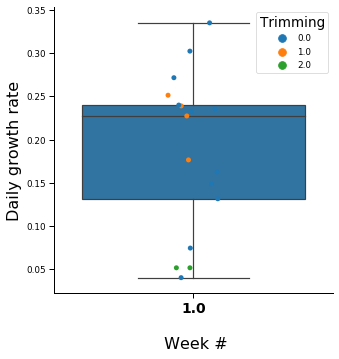

In [15]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],kind='box').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


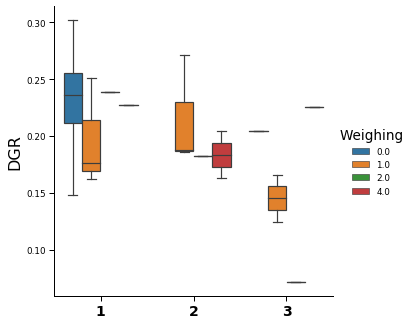

In [16]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Exp == 3)],kind='box',hue='Weighing').set(xlabel='')
SA1_TRM.set_xticklabels([''])
SA1_TRM.set_xticklabels(['1', '2','3'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


In [17]:
# post - hoc multiple comparisons between treatments in week 1

data = [d['DGR'][d['Exp'] == 1],
               d['DGR'][d['Exp'] == 2],
               d['DGR'][d['Exp'] == 3],
               #d['DGR'][d['Exp'] == 4],
               d['DGR'][d['Exp'] == 5]]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
# 1000/1/168 is different then 200/5/168 - based only on one experiment - maybe not enough


,2,3,4
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [18]:
# check if there is a difference between any treatments regarding DGR - ANOVA
# ANOVA

d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]


#df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
#df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
#df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

d.info()

rp.summary_cont(d['DGR'])

rp.summary_cont(d['DGR'].groupby(d['Treatment']))
stats.f_oneway(d['DGR'][d['Treatment'] == '1000/1/168'],
               d['DGR'][d['Treatment'] == '500/2/168'],
               d['DGR'][d['Treatment'] == '500/3/168'],
               d['DGR'][d['Treatment'] == '2000/1/168'],
               d['DGR'][d['Treatment'] == '2000/1/4'],
               d['DGR'][d['Treatment'] == '500/1/4'],
               d['DGR'][d['Treatment'] == '200/5/168']
              )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 472
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample      123 non-null    float64
 1   Exp         123 non-null    int64  
 2   Sleeve      123 non-null    int64  
 3   Week        123 non-null    float64
 4   Stage       123 non-null    object 
 5   Timei       123 non-null    object 
 6   Timeh       123 non-null    object 
 7   Time        123 non-null    object 
 8   DW          123 non-null    float64
 9   mmi         30 non-null     float64
 10  mm          123 non-null    float64
 11  V           123 non-null    float64
 12  N           98 non-null     float64
 13  C           98 non-null     float64
 14  H           98 non-null     float64
 15  S           98 non-null     float64
 16  Protein     8 non-null      float64
 17  Starch      0 non-null      float64
 18  NH4         83 non-null     float64
 19  NO3         0 non-null      

F_onewayResult(statistic=6.653876876045052, pvalue=4.5395564247870935e-06)

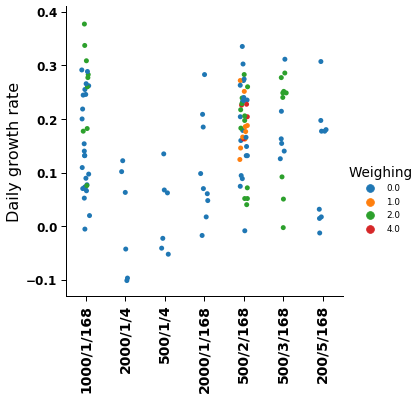

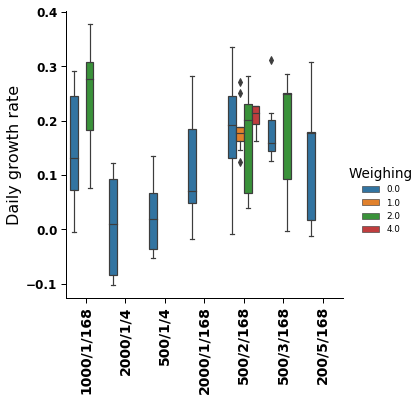

In [19]:
# S.A #1 - growth rates in with different number of weighings
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# strip plot - all data
SA1DGR = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Weighing').set(xlabel='', ylabel='Daily growth rate')
SA1DGR.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGR.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

# box plot
SA1DGRBOX = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Weighing',kind="box").set(xlabel='', ylabel='Daily growth rate')
SA1DGRBOX.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGRBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

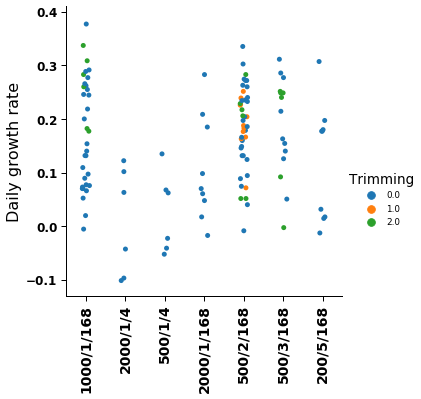

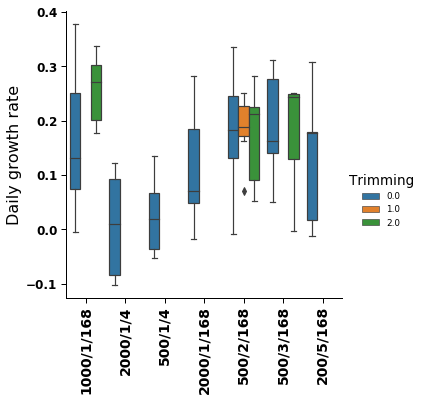

In [20]:
# S.A #1 - growth rates in with different number of trimmings
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# strip plot - all data
SA1DGR = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Trimming').set(xlabel='', ylabel='Daily growth rate')
SA1DGR.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGR.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

# box plot
SA1DGRBOX = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Trimming',kind="box").set(xlabel='', ylabel='Daily growth rate')
SA1DGRBOX.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGRBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

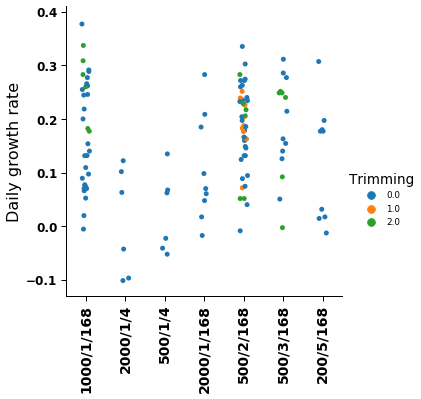

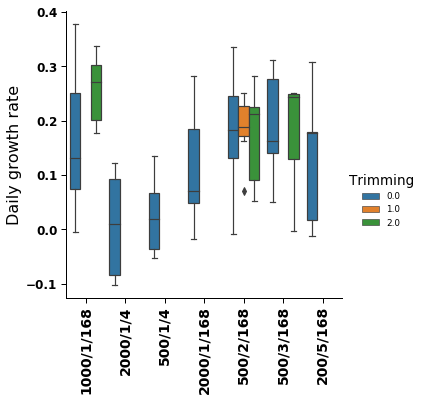

In [21]:
# S.A #1 - growth rates in with different number of trimmings
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# strip plot - all data
SA1DGR = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Trimming').set(xlabel='', ylabel='Daily growth rate')
SA1DGR.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGR.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

# box plot
SA1DGRBOX = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Trimming',kind="box").set(xlabel='', ylabel='Daily growth rate')
SA1DGRBOX.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGRBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

In [22]:
# System error analysis - effects of weighing stress and biomass trimming

# need to figure out the suitable statistical test

W0 = df2[(df2.Stage == 'f')&(df2.Exp == 3)&(df2.Sleeve != 7)&(df2.Sleeve != 8)&(df2.Sleeve != 9)&(df2.Weighing == 0)]["DGR"]
W1 = df2[(df2.Stage == 'f')&(df2.Exp == 3)&(df2.Sleeve != 7)&(df2.Sleeve != 8)&(df2.Sleeve != 9)&(df2.Weighing == 1)]["DGR"]
W2 = df2[(df2.Stage == 'f')&(df2.Exp == 3)&(df2.Sleeve != 7)&(df2.Sleeve != 8)&(df2.Sleeve != 9)&(df2.Weighing == 2)]["DGR"]
W4 = df2[(df2.Stage == 'f')&(df2.Exp == 3)&(df2.Sleeve != 7)&(df2.Sleeve != 8)&(df2.Sleeve != 9)&(df2.Weighing == 4)]["DGR"]

print(len(W0))
print(len(W1))
print(len(W2))
print(len(W4))

#sp.stats.friedmanchisquare(W0,W1,W2,W4)

2
9
3
4


In [23]:
df2[(df2.Stage == 'f')&(df2.Week == 1)].DGR

rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Sporulated != 'Yes')&(df2.Week == 1)].DGR)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,DGR,45.0,0.1587,0.0926,0.0138,0.1309,0.1865


In [24]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Sporulated != 'Yes')&(df2.Week == 2)].DGR)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,DGR,36.0,0.182,0.0917,0.0153,0.151,0.2131


In [25]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Sporulated != 'Yes')&(df2.Week == 3)].DGR)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,DGR,36.0,0.161,0.0952,0.0159,0.1288,0.1932
